### Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)

In [1]:
df=pd.read_csv('C:\\documents\\study material\\data science\\Machine learning udemy notes\\DATA\\heart.csv')

df.head()

<IPython.core.display.Javascript object>

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='target', ylabel='count'>

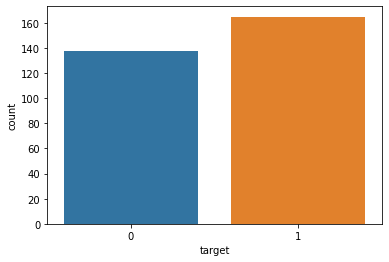

In [5]:
sns.countplot(x='target',data=df)

<IPython.core.display.Javascript object>

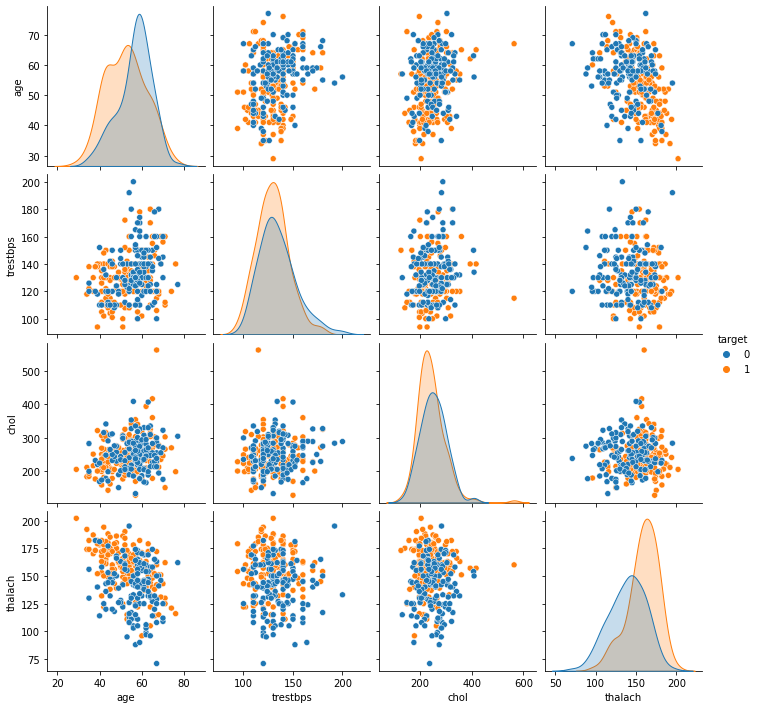

In [13]:
sns.pairplot(data=df,y_vars=['age','trestbps', 'chol','thalach'],x_vars=['age','trestbps', 'chol','thalach'],hue='target')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

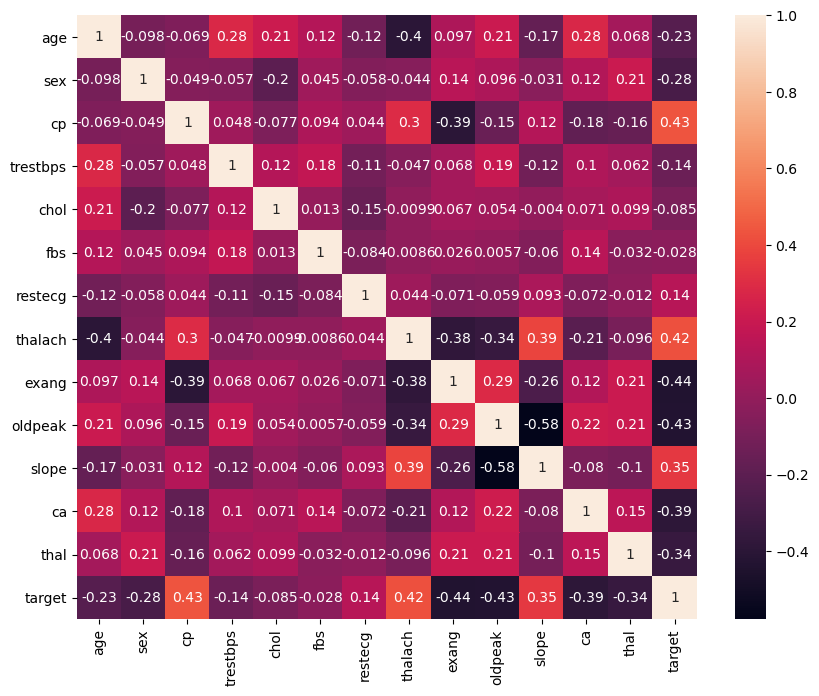

In [21]:
plt.figure(figsize=(10,8),dpi=100,)
sns.heatmap(df.corr(),annot=True)

In [22]:
X = df.drop('target',axis=1)
y = df['target']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegressionCV


In [35]:
penalty={'l1','l2','elasticnet'}



In [45]:
log_model = LogisticRegressionCV(solver='saga',multi_class="ovr",max_iter=5000,penalty='l2')

In [46]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV(max_iter=5000, multi_class='ovr', solver='saga')

In [87]:
log_model.coef_

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

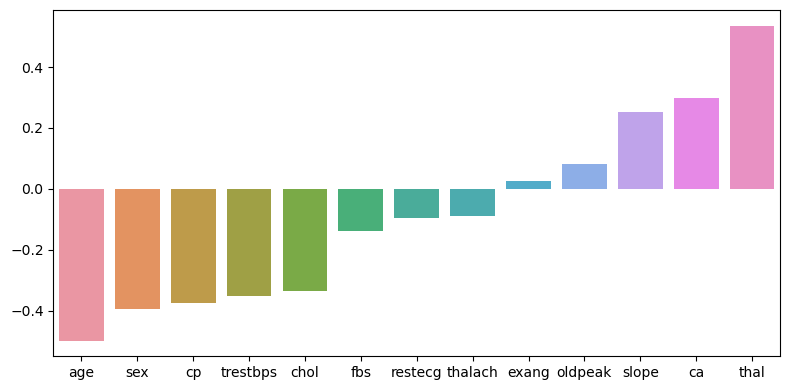

In [95]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(y=pd.Series(log_model.coef_[0]).sort_values(),x=X_train.columns)
plt.tight_layout()

In [89]:
pd.Series(log_model.coef_[0]).sort_values()

<IPython.core.display.Javascript object>

11   -0.497358
1    -0.394611
12   -0.374411
9    -0.352400
8    -0.334405
3    -0.138448
0    -0.096167
4    -0.088404
5     0.024990
6     0.080895
10    0.251055
7     0.299178
2     0.535368
dtype: float64

In [82]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [98]:
y_pred = log_model.predict(scaled_X_test)

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [101]:
accuracy_score(y_test,y_pred)

0.8387096774193549

In [102]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

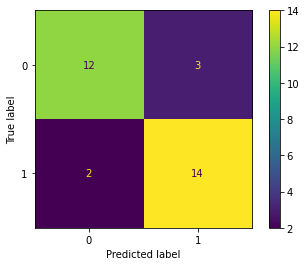

In [105]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [107]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

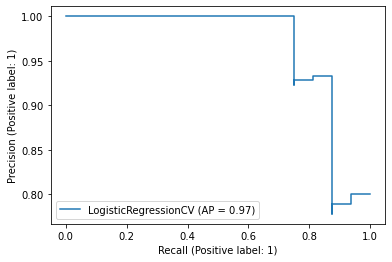

In [108]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

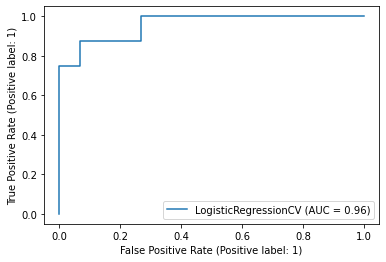

In [109]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [110]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [111]:
log_model.predict(patient)

array([0], dtype=int64)

In [112]:
log_model.predict_proba(patient)

array([[9.99999864e-01, 1.36429894e-07]])